In [1]:
import pandas as pd
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# 데이터 불러오기 및 인덱스 설정
# Date를 날짜 형식으로 변환하기는 사전에 다른 코드로 진행하여 완료해 놓았음
df = pd.read_csv('./XRT.csv', )
df_date = df.set_index('Date').copy()
# df_date = df_date.loc['2015-01-01':]

In [3]:
# 잘 불러와졌나 확인
df_date

,Adj Close,Open,High,Low,Close,Volume,VIX,Bullish,Neutral,Bearish,Bullish 8-Week Mov Avg,Bull-Bear Spread,Fear Greed,Put Call,12 Day EMA,26 Day EMA,macd,Fast %K,Slow %K(D),Slow %D(J)
Date,,,,,,,,,,,,,,,,,,,,
2011-02-08,21.603861,24.180000,24.469999,24.125000,24.455000,18940600,15.81,0.52,0.22,0.27,0.52,0.25,56,0.52,20.989968,20.849397,0.140571,-94.975507,-197.919807,-237.073248
2011-02-09,21.634781,24.430000,24.655001,24.385000,24.490000,23358200,15.87,0.52,0.22,0.27,0.52,0.25,56,0.52,21.089170,20.907573,0.181597,-82.490524,-142.029581,-192.120741
2011-02-10,21.718706,24.385000,24.590000,24.295000,24.584999,15578200,16.09,0.49,0.24,0.27,0.52,0.22,56,0.55,21.186022,20.967657,0.218364,-77.419530,-105.513003,-148.487464
2011-02-11,21.943977,24.495001,24.840000,24.395000,24.840000,17885400,15.69,0.49,0.24,0.27,0.52,0.22,56,0.51,21.302630,21.039977,0.262653,-57.392554,-86.697202,-111.413262
2011-02-14,21.833555,24.889999,24.924999,24.620001,24.715000,13698400,15.95,0.49,0.24,0.27,0.52,0.22,61,0.51,21.384311,21.098761,0.285550,-60.594577,-74.574539,-88.928248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,50.808632,50.419998,51.040001,50.230000,50.939999,2636600,25.85,0.24,0.28,0.48,0.27,-0.25,59,0.49,51.002645,50.657596,0.345049,33.223247,22.384786,22.817140
2020-09-15,50.678970,51.389999,51.500000,50.700001,50.810001,2595000,25.59,0.24,0.28,0.48,0.27,-0.25,59,0.46,50.952849,50.659179,0.293670,30.186667,25.327999,23.334708
2020-09-16,50.918350,51.119999,51.720001,50.860001,51.049999,2989500,26.04,0.24,0.28,0.48,0.27,-0.25,56,0.51,50.947541,50.678377,0.269164,35.792755,25.327999,24.346928


In [4]:
# Nan 값이 있는지 확인
# 모두 2445개로 Nan 값, str 값 없음 확인
df_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2420 entries, 2011-02-08 to 2020-09-18
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Adj Close               2420 non-null   float64
 1   Open                    2420 non-null   float64
 2   High                    2420 non-null   float64
 3   Low                     2420 non-null   float64
 4   Close                   2420 non-null   float64
 5   Volume                  2420 non-null   int64  
 6   VIX                     2420 non-null   float64
 7   Bullish                 2420 non-null   float64
 8   Neutral                 2420 non-null   float64
 9   Bearish                 2420 non-null   float64
 10  Bullish 8-Week Mov Avg  2420 non-null   float64
 11  Bull-Bear Spread        2420 non-null   float64
 12  Fear Greed              2420 non-null   int64  
 13  Put Call                2420 non-null   float64
 14  12 Day EMA              2420 n

In [5]:
first = df_date.loc[:'2019-12-01']
last = df_date.loc['2019-12-01':]

In [6]:
# 0,1로 스케일링
scaler = MinMaxScaler()

scaled_first = pd.DataFrame(scaler.fit_transform(first), columns=first.columns, index = first.index)
scaled_last = pd.DataFrame(scaler.fit_transform(last), columns=last.columns, index = last.index)

In [7]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
#    forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [8]:
# 과거 20일의 데이터를 가지고
n_days = 20
n_features = len(scaled_first.columns)

# 미래 1일을 예측
future_window = 1

In [9]:
reframed_first = series_to_supervised(scaled_first, n_days, 1)
reframed_last = series_to_supervised(scaled_last, n_days, 1)

In [10]:
reframed = pd.concat([reframed_first, reframed_last])

In [11]:
reframed_last

,var1(t-20),var2(t-20),var3(t-20),var4(t-20),var5(t-20),var6(t-20),var7(t-20),var8(t-20),var9(t-20),var10(t-20),...,var11(t),var12(t),var13(t),var14(t),var15(t),var16(t),var17(t),var18(t),var19(t),var20(t)
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,0.633737,0.665118,0.655852,0.676917,0.654871,0.288738,0.039807,0.538462,0.807692,0.303030,...,0.928571,0.924528,0.957895,0.208791,0.690073,0.668188,0.735091,0.583234,0.636678,0.673772
2020-01-02,0.611255,0.625242,0.617227,0.648064,0.632039,0.174207,0.054682,0.538462,0.807692,0.303030,...,0.928571,0.830189,1.000000,0.186813,0.690609,0.670631,0.729722,0.439841,0.570196,0.625139
2020-01-03,0.622871,0.630662,0.634608,0.662491,0.643836,0.177253,0.038249,0.538462,0.807692,0.303030,...,0.928571,0.830189,0.957895,0.197802,0.688738,0.671536,0.720220,0.235735,0.432791,0.546044
2020-01-06,0.616875,0.637243,0.636539,0.660213,0.637747,0.174658,0.034282,0.461538,0.923077,0.272727,...,0.928571,0.830189,0.957895,0.186813,0.688218,0.672995,0.713964,0.306750,0.345197,0.446402
2020-01-07,0.654720,0.656214,0.664349,0.686029,0.676180,0.159408,0.021533,0.461538,0.923077,0.272727,...,0.928571,0.830189,0.915789,0.076923,0.686715,0.673725,0.706322,0.235735,0.270833,0.344064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,0.934699,0.913279,0.923523,0.934320,0.934551,0.132985,0.140955,0.384615,0.500000,0.666667,...,0.142857,0.075472,0.600000,0.131868,0.948629,0.992299,0.703669,0.413647,0.216678,0.212534
2020-09-15,0.978739,0.943089,0.966396,0.970008,0.978691,0.161965,0.131038,0.384615,0.500000,0.666667,...,0.142857,0.075472,0.600000,0.098901,0.946456,0.992383,0.695527,0.385847,0.248511,0.218275
2020-09-16,0.963173,0.970190,0.959444,0.966211,0.963090,0.243119,0.133305,0.384615,0.500000,0.666667,...,0.142857,0.075472,0.568421,0.153846,0.946225,0.993399,0.691644,0.437171,0.248511,0.229503


In [12]:
values = reframed_first.values
test_values = reframed_last.values

# 분할지점
train = values
test = test_values

n_obs = n_days * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)

train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(2198, 400) 2198 (2198,)
(2198, 20, 20) (2198,) (182, 20, 20) (182,)


In [13]:
test_y

array([0.70960939, 0.69643369, 0.68325784, 0.68928116, 0.68325784,
       0.68664603, 0.67949335, 0.67459973, 0.68438724, 0.69455127,
       0.68438724, 0.70659788, 0.70471577, 0.69568067, 0.68928116,
       0.68739875, 0.66782339, 0.65163608, 0.6610474 , 0.65728272,
       0.6478714 , 0.59855669, 0.61474389, 0.62754333, 0.66481177,
       0.65540045, 0.63055468, 0.63431936, 0.64711853, 0.6753523 ,
       0.66895279, 0.66481177, 0.6719643 , 0.67572898, 0.71299738,
       0.70170395, 0.64034253, 0.58462771, 0.54773579, 0.5036912 ,
       0.49390312, 0.51799614, 0.48298633, 0.52138402, 0.46717524,
       0.45061155, 0.37080386, 0.39564963, 0.2940081 , 0.13175794,
       0.21005966, 0.0564678 , 0.11218247, 0.02221075, 0.07943131,
       0.03011622, 0.        , 0.10417594, 0.1238747 , 0.1594839 ,
       0.11516182, 0.11478289, 0.10569127, 0.03939744, 0.02462336,
       0.00757645, 0.12198045, 0.15190741, 0.20418479, 0.24850684,
       0.23827878, 0.28070683, 0.23032356, 0.22691394, 0.27957

In [14]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))

model.add(Dense(future_window))
model.compile(loss='mse', optimizer='adam')

In [15]:
history = model.fit(train_X, train_y, epochs=100, batch_size=250, verbose=2, shuffle=False, validation_data=(test_X, test_y))

Epoch 1/100
9/9 - 1s - loss: 0.0504 - val_loss: 0.0840
Epoch 2/100
9/9 - 0s - loss: 0.0591 - val_loss: 0.0219
Epoch 3/100
9/9 - 0s - loss: 0.0056 - val_loss: 0.0063
Epoch 4/100
9/9 - 0s - loss: 0.0092 - val_loss: 0.0096
Epoch 5/100
9/9 - 0s - loss: 0.0037 - val_loss: 0.0054
Epoch 6/100
9/9 - 0s - loss: 0.0041 - val_loss: 0.0071
Epoch 7/100
9/9 - 0s - loss: 0.0023 - val_loss: 0.0039
Epoch 8/100
9/9 - 0s - loss: 0.0025 - val_loss: 0.0052
Epoch 9/100
9/9 - 0s - loss: 0.0014 - val_loss: 0.0035
Epoch 10/100
9/9 - 0s - loss: 0.0018 - val_loss: 0.0050
Epoch 11/100
9/9 - 0s - loss: 0.0010 - val_loss: 0.0034
Epoch 12/100
9/9 - 0s - loss: 0.0012 - val_loss: 0.0042
Epoch 13/100
9/9 - 0s - loss: 8.9730e-04 - val_loss: 0.0034
Epoch 14/100
9/9 - 0s - loss: 8.7896e-04 - val_loss: 0.0034
Epoch 15/100
9/9 - 0s - loss: 8.5948e-04 - val_loss: 0.0034
Epoch 16/100
9/9 - 0s - loss: 7.8543e-04 - val_loss: 0.0033
Epoch 17/100
9/9 - 0s - loss: 7.7296e-04 - val_loss: 0.0032
Epoch 18/100
9/9 - 0s - loss: 7.6026e

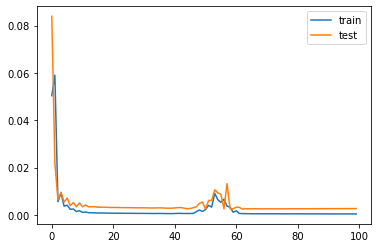

In [16]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [17]:
test_X.shape

(182, 20, 20)

In [1]:
y_pred = model.predict(test_X)

NameError: name 'model' is not defined

In [19]:
y_pred[1][-1]

0.668044

In [20]:
len(test_y)

182

In [21]:
prediction_x = [1]
prediction_y = []

for i in range(0, len(y_pred)):
    prediction_x.append(y_pred[i][-1])
    prediction_y.append(i) #+future_window)

In [22]:
test = list(test_y)

In [23]:
k = [0]
tt = test.append(k)

In [24]:
prediction_x

[1,
 0.6682666,
 0.668044,
 0.66214395,
 0.64830685,
 0.6486857,
 0.6525565,
 0.65210485,
 0.6456458,
 0.6420244,
 0.64959913,
 0.65741855,
 0.65538394,
 0.6653333,
 0.66986966,
 0.6589264,
 0.65253717,
 0.64414513,
 0.6237261,
 0.6083548,
 0.6181463,
 0.62088746,
 0.6090175,
 0.577776,
 0.5872164,
 0.590044,
 0.60460305,
 0.62239456,
 0.6125496,
 0.6118516,
 0.6170216,
 0.62612873,
 0.62770593,
 0.6274361,
 0.63258785,
 0.64233464,
 0.64850533,
 0.6479399,
 0.61488825,
 0.57129914,
 0.5475827,
 0.49299496,
 0.46921912,
 0.47131053,
 0.45487618,
 0.4689566,
 0.45180807,
 0.4134306,
 0.35433826,
 0.36802644,
 0.32207698,
 0.24429387,
 0.23536292,
 0.18001108,
 0.16822095,
 0.13227624,
 0.11126953,
 0.09920337,
 0.09050343,
 0.08818051,
 0.09523255,
 0.112839825,
 0.10905369,
 0.11075351,
 0.10661732,
 0.08126,
 0.06580275,
 0.048843484,
 0.067159474,
 0.097830035,
 0.12743479,
 0.16007167,
 0.17826277,
 0.20850979,
 0.1999439,
 0.20150915,
 0.2197527,
 0.22724167,
 0.21731564,
 0.219921

In [25]:
a = pd.DataFrame(test_y)
b = pd.DataFrame(prediction_x)

In [26]:
c = pd.concat([a,b], axis=1)

In [27]:
c.columns = ['real', 'pred']

In [28]:
c

,real,pred
0,0.709609,1.000000
1,0.696434,0.668267
2,0.683258,0.668044
3,0.689281,0.662144
4,0.683258,0.648307
...,...,...
178,0.906604,0.877773
179,0.915716,0.890262
180,0.897113,0.897046
181,0.891418,0.897526


In [29]:
mse = 0

for i in range(5, len(y_pred) - n_days):
    mse += (prediction_x[i] - test_y[i])**2

mse/(len(y_pred) - n_days)

0.004113988678325111

In [30]:
c.to_excel('XRT_pred.xlsx')